<a href="https://colab.research.google.com/github/ucfilho/Raianars_July_2020/blob/master/DE_diversity_FakeRosenbrock_jul_10_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Raianars_July_2020 #clonar do Github
%cd Raianars_July_2020

Cloning into 'Raianars_July_2020'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 166 (delta 21), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (166/166), 324.96 KiB | 11.21 MiB/s, done.
Resolving deltas: 100% (83/83), done.
/content/Raianars_July_2020


In [3]:
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX


############################### DADOS DE ENTRADA 
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=100 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=20 # NUMBER OF PARTICLES



mut=0.5
crossp=0.5
RUNS=5
Dimension=[5,10,15,20,30]



SOMA=0

In [4]:
def Diversity(X):
  soma=0
  nrow,ncol=X.shape
  for j in range(ncol):
    Xj=np.mean(X[:,j])
    for i in range(nrow):
        soma=soma+(X[i,j]-Xj)**2
  DI=(soma/nrow)**0.5
  return DI

In [5]:
start_time = time.time()
BEST_AGENTS=[]
MAT_Div=[]

for i in range(RUNS):

    #fchoice='Fake_Rosenbrock'  
    #Fun=Function.Fake_Rosenbrock
    fchoice='Rosenbrock'  
    Fun=Function.Rosenbrock
    

    dim=Dimension[i]
    
    TOTAL=10*dim*its*ITE

    

    MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)

    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(dim)
    for ii in range(dim):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Div_initial=Diversity(X)
    #print('=====',X[1,1],'======')
    
    Div_dim=[]
    BEST_AGENTS=[]
    SOMA=0

    print('dimension=',dim)
    print('========',len(MAX),'========')

    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      
      if((k+1)%1==0):
        #print(X[1,1])
        Div_time=Diversity(X)
        DI=Div_time/Div_initial
        Div_dim.append(DI)

    BEST_AGENTS.append(BEST_XY)    
    MAT_Div.append(Div_dim)
    start_run = (time.time()-start_time)/60
    print('run=',i,'total=50','Fobj=',FOBEST,'Time=',start_run)  
    

    ############################## Cálculo dos Parâmetros de Avaliação   
    TIME = (time.time() - start_time)/RUNS
    BEST_AGENTS=np.array(BEST_AGENTS)
    BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
    BEST=BEST_AGENTS_ST[0]
    WORSE=BEST_AGENTS_ST[-1]
    MEAN=np.mean(BEST_AGENTS,axis=0)
    MAXFO=BEST_AGENTS[:,-1].max()
    MINFO=BEST_AGENTS[:,-1].min()
    STD=BEST_AGENTS[:,-1].std()

    nome='_DE_STAT_Fo-'+str(mut)+'_CRo-'+str(crossp)+'_D-'+str(dim)+'_Interv-'+str(ITE)
    print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', dim,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
    print(nome, '\n')
    #print('BEST: ',BEST)
    #print('MÉDIA: ',MEAN)
    print('MÉDIA: ',MEAN[-1])
    print('MIN __:',MINFO)
    print('MAX__: ',MAXFO)
    print('STD __:',STD)
    print("Tempo Médio= %.3f segundos ---" % (TIME))
    print(RUNS,'Rodadas') 
    print()
    print('BEST: ',BEST)
    # print('melhor=',BEST_AGENTS[BEST_INDEX])

dimension= 5
======== 5 ========
run= 0 total=50 Fobj= 1.5321340851401533 Time= 0.003920960426330567
DE_POP_VAR_F_CR TOTAL= 5000 Iterações= 100 Dim= 5 Min/Max= -10 / 10 _ Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-5_Interv-100 

MÉDIA:  1.5321340851401533
MIN __: 1.5321340851401533
MAX__:  1.5321340851401533
STD __: 0.0
Tempo Médio= 0.047 segundos ---
5 Rodadas

BEST:  [7.56374462e-01 5.93801317e-01 3.37460025e-01 1.13491391e-01
 1.52026767e-03 1.53213409e+00]
dimension= 10
======== 10 ========
run= 1 total=50 Fobj= 24.165189596880026 Time= 0.010202113787333171
DE_POP_VAR_F_CR TOTAL= 10000 Iterações= 100 Dim= 10 Min/Max= -10 / 10 _ Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-10_Interv-100 

MÉDIA:  24.165189596880026
MIN __: 24.165189596880026
MAX__:  24.165189596880026
STD __: 0.0
Tempo Médio= 0.122 segundos ---
5 Rodadas

BEST:  [ 3.32368387e-01  1.64322298e-01  1.36196324e-01 -4.75692497e-02
  4.13756327e-02  7.46431154e-03 -6.20379031e-02  3.75274148e-01
  1.96028169e-01  1.12395280e-01  2.4165

In [6]:
X.shape

(20, 30)

In [7]:
print(pd.DataFrame(MAT_Div))

         0         1         2   ...        97        98        99
0  0.900209  0.866175  0.818188  ...  0.011912  0.011915  0.012087
1  0.923593  0.850484  0.808960  ...  0.033410  0.032748  0.032320
2  0.936961  0.907824  0.904891  ...  0.042823  0.043823  0.044289
3  0.977066  0.961607  0.930409  ...  0.090901  0.089278  0.089092
4  0.968380  0.968380  0.958521  ...  0.196000  0.196539  0.189732

[5 rows x 100 columns]


In [8]:
start_time = time.time()
BEST_AGENTS=[]
MAT_Div_Fake=[]

for i in range(RUNS):

    fchoice='Fake_Rosenbrock'  
    Fun=Function.Fake_Rosenbrock
    #fchoice='Rosenbrock'  
    #Fun=Function.Rosenbrock
    

    dim=Dimension[i]
    
    TOTAL=10*dim*its*ITE

    print('dimension=',dim)

    MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)

    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(dim)
    for ii in range(dim):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Div_initial=Diversity(X)
    #print('=====',X[1,1],'======')
    
    Div_dim=[]
    BEST_AGENTS=[]
    SOMA=0

    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      
      if((k+1)%1==0):
        #print(X[1,1])
        Div_time=Diversity(X)
        DI=Div_time/Div_initial
        Div_dim.append(DI)

    BEST_AGENTS.append(BEST_XY)    
    MAT_Div_Fake.append(Div_dim)
    start_run = (time.time()-start_time)/60
    print('run=',i,'total=50','Fobj=',FOBEST,'Time=',start_run)  
    

    ############################## Cálculo dos Parâmetros de Avaliação   
    TIME = (time.time() - start_time)/RUNS
    BEST_AGENTS=np.array(BEST_AGENTS)
    BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
    BEST=BEST_AGENTS_ST[0]
    WORSE=BEST_AGENTS_ST[-1]
    MEAN=np.mean(BEST_AGENTS,axis=0)
    MAXFO=BEST_AGENTS[:,-1].max()
    MINFO=BEST_AGENTS[:,-1].min()
    STD=BEST_AGENTS[:,-1].std()

    nome='_DE_STAT_Fo-'+str(mut)+'_CRo-'+str(crossp)+'_D-'+str(dim)+'_Interv-'+str(ITE)
    print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', dim,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
    print(nome, '\n')
    #print('BEST: ',BEST)
    #print('MÉDIA: ',MEAN)
    print('MÉDIA: ',MEAN[-1])
    print('MIN __:',MINFO)
    print('MAX__: ',MAXFO)
    print('STD __:',STD)
    print("Tempo Médio= %.3f segundos ---" % (TIME))
    print(RUNS,'Rodadas') 
    print()
    print('BEST: ',BEST)
    # print('melhor=',BEST_AGENTS[BEST_INDEX])

dimension= 5
run= 0 total=50 Fobj= 0.0008375760369423613 Time= 0.0037331541379292807
DE_POP_VAR_F_CR TOTAL= 5000 Iterações= 100 Dim= 5 Min/Max= -10 / 10 _ Fake_Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-5_Interv-100 

MÉDIA:  0.0008375760369423613
MIN __: 0.0008375760369423613
MAX__:  0.0008375760369423613
STD __: 0.0
Tempo Médio= 0.045 segundos ---
5 Rodadas

BEST:  [-5.51465141e+00 -2.62283318e+00  9.80479949e-01  9.59204243e-01
  1.08156846e+00  8.37576037e-04]
dimension= 10
run= 1 total=50 Fobj= 2.1562169260586678e-05 Time= 0.009972087542215983
DE_POP_VAR_F_CR TOTAL= 10000 Iterações= 100 Dim= 10 Min/Max= -10 / 10 _ Fake_Rosenbrock
_DE_STAT_Fo-0.5_CRo-0.5_D-10_Interv-100 

MÉDIA:  2.1562169260586678e-05
MIN __: 2.1562169260586678e-05
MAX__:  2.1562169260586678e-05
STD __: 0.0
Tempo Médio= 0.120 segundos ---
5 Rodadas

BEST:  [-3.22876557e+00 -5.28827478e+00  1.00000000e+01  2.04789794e+00
  8.78675992e+00 -9.59340624e+00  8.18086997e+00  9.97614049e-01
  9.94835427e-01 -2.91519221e+00  2.

In [9]:
print(pd.DataFrame(MAT_Div_Fake))

         0         1         2   ...        97        98        99
0  0.982482  0.975011  0.907603  ...  0.722976  0.700036  0.697121
1  0.981218  0.973669  0.998071  ...  0.921094  0.921094  0.921094
2  0.969735  0.990920  0.976229  ...  0.922043  0.926972  0.908523
3  0.989396  0.962236  0.951598  ...  0.946806  0.946806  0.949254
4  0.994642  1.004092  0.988722  ...  0.926250  0.938215  0.940736

[5 rows x 100 columns]


"\nplt.legend( ('SeiCo', 'Rosenbrock'), loc=[1,5], fontsize=10)\n"

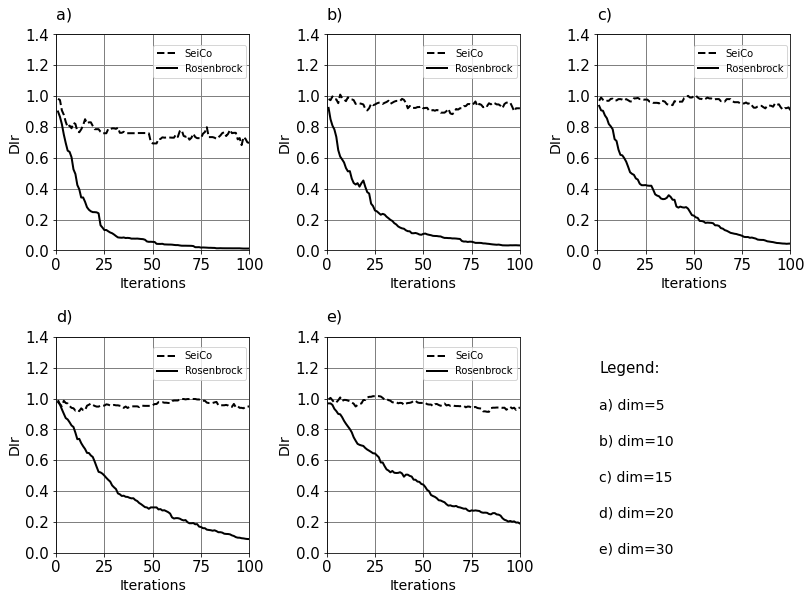

In [10]:
Legends=['a)', 'b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)','m)', 'n)']
xite=range(1,101)
for i in range(RUNS):

  plt.subplot(2,3,i+1)
  plt.plot(xite,pd.DataFrame(MAT_Div_Fake).iloc[i],'k--',xite,pd.DataFrame(MAT_Div).iloc[i],'k-', linewidth=2)
  plt.xlim(0, 100)
  plt.ylim(0, 1.4)
  plt.text(-0.2,1.5,Legends[i],fontsize=16)
  #plt.legend( ('SeiCo', 'Rosenbrock'), loc=[90,0.8], fontsize=10)
  plt.legend( ('SeiCo', 'Rosenbrock'), loc=[0.5,0.8], fontsize=10)
  #plt.text(-0.2,1.2,Legends[i],fontsize=16)
  plt.xlabel('Iterations', fontsize=14)
  plt.ylabel('DIr', fontsize=14)
  plt.grid(True, linewidth=1,color='gray')
  plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(bottom=0.2, right=2, left=0.3, top=2,hspace=0.4, wspace=0.4)

plt.subplot(2,3,RUNS+1)
plt.plot()
plt.ylim(0, 1.2)     # set the ylim to bottom, top
plt.xlim(0, 100)     # set the ylim to bottom, top
plt.axis('off')
plt.text(1,1,'Legend:',fontsize=15, color = 'k')
for i in range(RUNS):
  nome=Legends[i]+' dim='+str(Dimension[i])
  y=1.2-i*0.2-0.4
  plt.text(1,y,nome,fontsize=14, color = 'k')

'''
plt.legend( ('SeiCo', 'Rosenbrock'), loc=[1,5], fontsize=10)
'''